In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn  #> 학습 위해 만들어 놓은 패키지

import warnings
warnings.filterwarnings("ignore")

from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
from sklearn import datasets

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Support Vector Machine

    1) 딥러닝 이전까지 가장 우수한 성능 나타내던 머신러닝
    
    2) Dataset 많지 않아도 좋은 성능 나타냄
        + 주변에 있는 적은 데이터만으로 분석
        
        + margine: 각 데이터 하나하나의 margine 조정
        
        + cost: 데이터 경계선들의 margine 조정
            - 낮을수록 모델 간단
        
        + gamma 높아질 때마다 훈련 향상, 예측 감소
        
        + Grid Search 통해 cost와 gamma의 최적값 찾는다

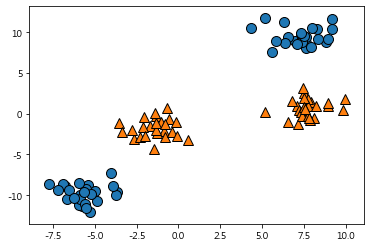

In [6]:
X, y = datasets.make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

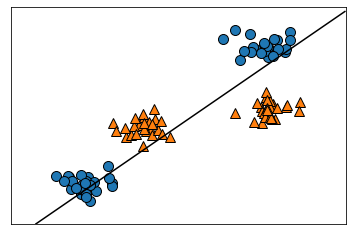

In [8]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0.5, 0, '특성1 ** 2')

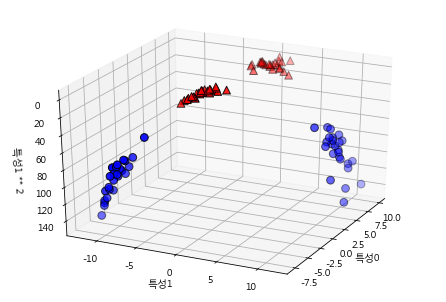

In [9]:
# 차원을 높여 구분 위한 직선을 평면으로 그림

X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y==0 인 포인트를 먼저 그리고 그다음 y==1 인 포인트를 그린다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0.5, 0, '특성1 ** 2')

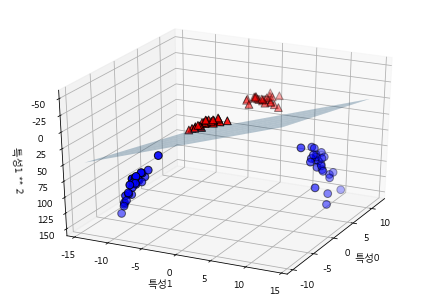

In [10]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

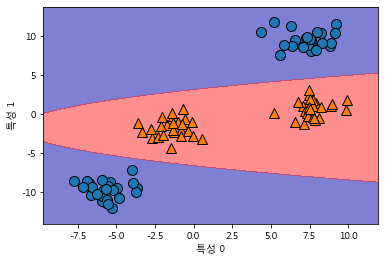

In [12]:
# 3차원을 그대로 다시 2차원으로

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)  #> contourf() 그래프를 등고선처럼 그려주는 함수
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 파라미터: cost, gamma

Text(0, 0.5, '특성 1')

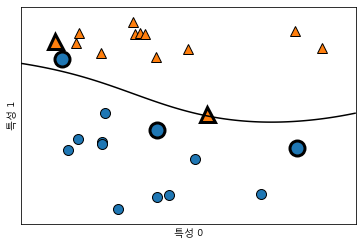

In [13]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)  #> rbf 가우시안 커널(알고리즘). 기본값 C=1, gamma=1/feature개수

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

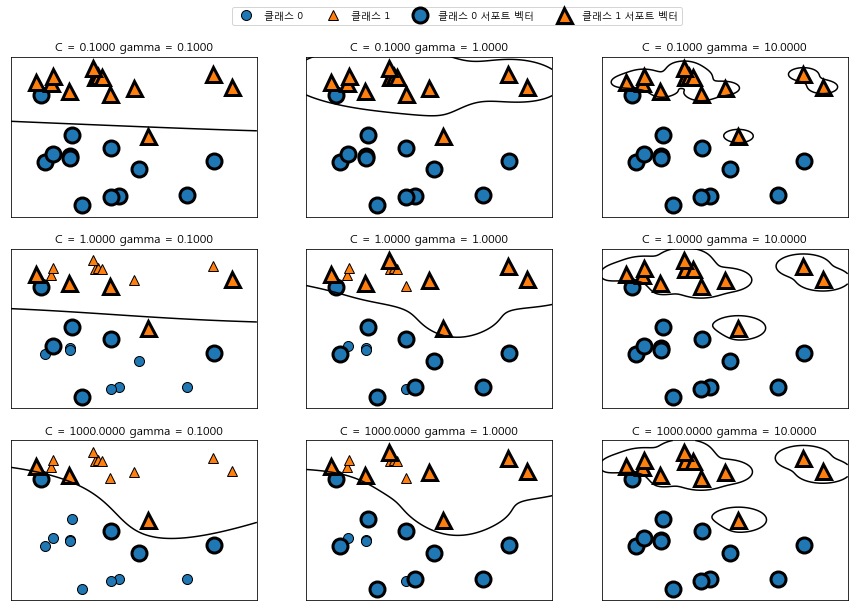

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

각 머신러닝 모델별 어떤 값 조절하여 튜닝할 수 있는지??

In [15]:
### 유방암 데이터

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [16]:
# 파라미터 기본값: cost=1, gamma=1/feature수

svc = SVC().fit(X_train, y_train)

In [18]:
print("훈련 셋: ", svc.score(X_train, y_train))  #> 과적합. 스케일의 차이에 민감(스케일 조정 필요)
print("테스트 셋: ", svc.score(X_test, y_test))

훈련 셋:  1.0
테스트 셋:  0.6293706293706294


In [19]:
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# 특성별 최소값

min_on_training = X_train.min(axis=0)
min_on_training

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.628e-01,
       7.570e-01, 7.228e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [21]:
# 특성별 범위(최대값 - 최소값)

range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training

array([2.11290e+01, 2.41000e+01, 1.44710e+02, 2.35750e+03, 9.20700e-02,
       2.92020e-01, 4.26800e-01, 2.01200e-01, 1.98000e-01, 4.74800e-02,
       2.76150e+00, 4.52220e+00, 2.12230e+01, 5.34972e+02, 2.16170e-02,
       1.04148e-01, 3.96000e-01, 5.27900e-02, 5.35780e-02, 2.89452e-02,
       2.81100e+01, 3.75200e+01, 2.00790e+02, 4.06880e+03, 1.51430e-01,
       1.03071e+00, 1.25200e+00, 2.90300e-01, 5.07300e-01, 1.52460e-01])

In [22]:
# 스케일 조정

X_train_scaled = (X_train-min_on_training) / range_on_training
X_test_scaled = (X_test-min_on_training) / range_on_training

print("특성별 최소값: ", X_train_scaled.min(axis=0))
print("특성별 최대값: ", X_train_scaled.max(axis=0))

print("특성별 최소값: ", X_test_scaled.min(axis=0))
print("특성별 최대값: ", X_test_scaled.max(axis=0))

특성별 최소값:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
특성별 최소값:  [ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
특성별 최대값:  [0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


In [23]:
svc = SVC().fit(X_train_scaled, y_train)

In [24]:
print("훈련 셋: ", svc.score(X_train_scaled, y_train))
print("테스트 셋: ", svc.score(X_test_scaled, y_test))

훈련 셋:  0.9483568075117371
테스트 셋:  0.951048951048951


In [25]:
# cost로 성능 튜닝

svc = SVC(C=1000).fit(X_train_scaled, y_train)

In [26]:
print("훈련 셋: ", svc.score(X_train_scaled, y_train))
print("테스트 셋: ", svc.score(X_test_scaled, y_test))

훈련 셋:  0.9882629107981221
테스트 셋:  0.972027972027972


In [6]:
### 붓꽃 데이터

from sklearn import datasets
from sklearn.svm import SVC

iris = datasets.load_iris()

In [20]:
# 일반 데이터셋으로 SVM

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [21]:
svc = SVC().fit(X_train, y_train)

In [22]:
print("훈련 셋: ", svc.score(X_train, y_train))
print("테스트 셋: ", svc.score(X_test, y_test))

훈련 셋:  0.9821428571428571
테스트 셋:  0.9736842105263158


In [23]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# 데이터값 정규화 후 SVM

from sklearn import preprocessing

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, iris.target, random_state=0)

In [26]:
svc = SVC().fit(X_train, y_train)

print("훈련 셋: ", svc.score(X_train, y_train))
print("테스트 셋: ", svc.score(X_test, y_test))

훈련 셋:  0.9464285714285714
테스트 셋:  0.9736842105263158


In [15]:
### 붓꽃 데이터(강사님)

iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
X = iris.data[:, [2, 3]]  #> petal length와 petal width로(가장 영향력 있는 변수)
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
from sklearn.svm import SVC

model = SVC().fit(X_train, y_train)

In [19]:
print("훈련 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

훈련 결과:  0.9714285714285714
테스트 결과:  0.9777777777777777


In [27]:
### 농구선수의 포지션 예측

df = pd.read_csv("data/basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [28]:
df.Pos.value_counts()  #> SG = Shooting Guard, C = Center

C     50
SG    50
Name: Pos, dtype: int64

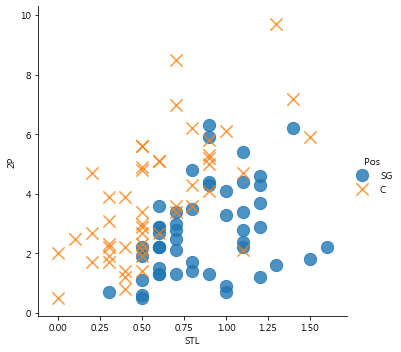

In [32]:
## 불필요한 특징 구분 위한 시각화

# 스틸과 2점 슛: 포지션에 영향을 받지 않는다
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

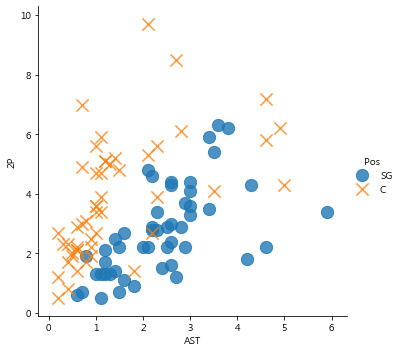

In [33]:
# 어시스트와 2점 슛: 포지션에 영향을 받지 않는다
sns.lmplot("AST", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

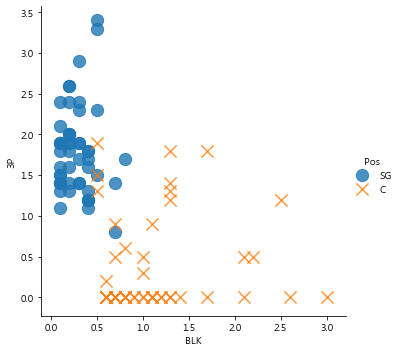

In [34]:
# 블로킹과 3점 슛: 포지션에 영향을 받는다(구분이 된다)
sns.lmplot("BLK", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

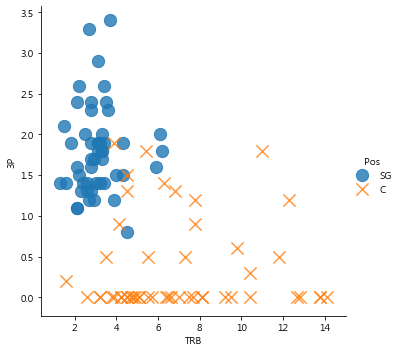

In [35]:
# 리바운드와 3점 슛: 포지션에 영향을 받는다(구분이 된다)
sns.lmplot("TRB", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], scatter_kws={"s":150})

In [36]:
# 불필요한 특성 제거
df.drop(["2P", "AST", "STL"], axis=1, inplace=True)

In [39]:
df.shape

(100, 5)

In [40]:
train, test = train_test_split(df, test_size=0.2)
train.shape[0]
test.shape[0]

20

In [41]:
# 파일로 저장: 데이터 클 경우 2진 형식으로 저장(직렬화)
import pickle

with open("data/basketball_train.pkl", "wb") as train_data:
    pickle.dump(train, train_data)
    
with open("data/basketball_test.pkl", "wb") as test_data:
    pickle.dump(test, test_data)

In [42]:
# 데이터 불러오기
with open("data/basketball_train.pkl", "rb") as train_data:
    train = pickle.load(train_data)
    
with open("data/basketball_test.pkl", "rb") as test_data:
    test = pickle.load(test_data)

In [43]:
# SVM 파라미터 찾는 방법(Grid Search)
# cost: 결정 경계선의 마진 결정하는 파라미터(cost 클수록 margine 작아짐)
# gamma: 커널의 데이터 포인트 표준편차 결정하는 파라미터(gamma 클수록 결정경계 데이터에 점점 가까워진다)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [51]:
def svc_param_selection(X, y, nfolds):  #> nfolds 교차검증 위한 변수(GridSearcCV에서 교차검증 수행)
    svm_parameters = [{"kernel":["rbf"], "gamma":[0.00001, 0.0001, 0.001, 0.1, 1], "C":[0.01, 0.1, 1, 10, 100, 1000]}]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X, y)
    print("최적의 파라미터: ", clf.best_params_)  #> best_params_에 최적의 파라미터값이 저장되어 있다
    return clf

In [52]:
X_train = train[["3P", "BLK"]]
y_train = train["Pos"]

clf = svc_param_selection(X_train, y_train, 10)

최적의 파라미터:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


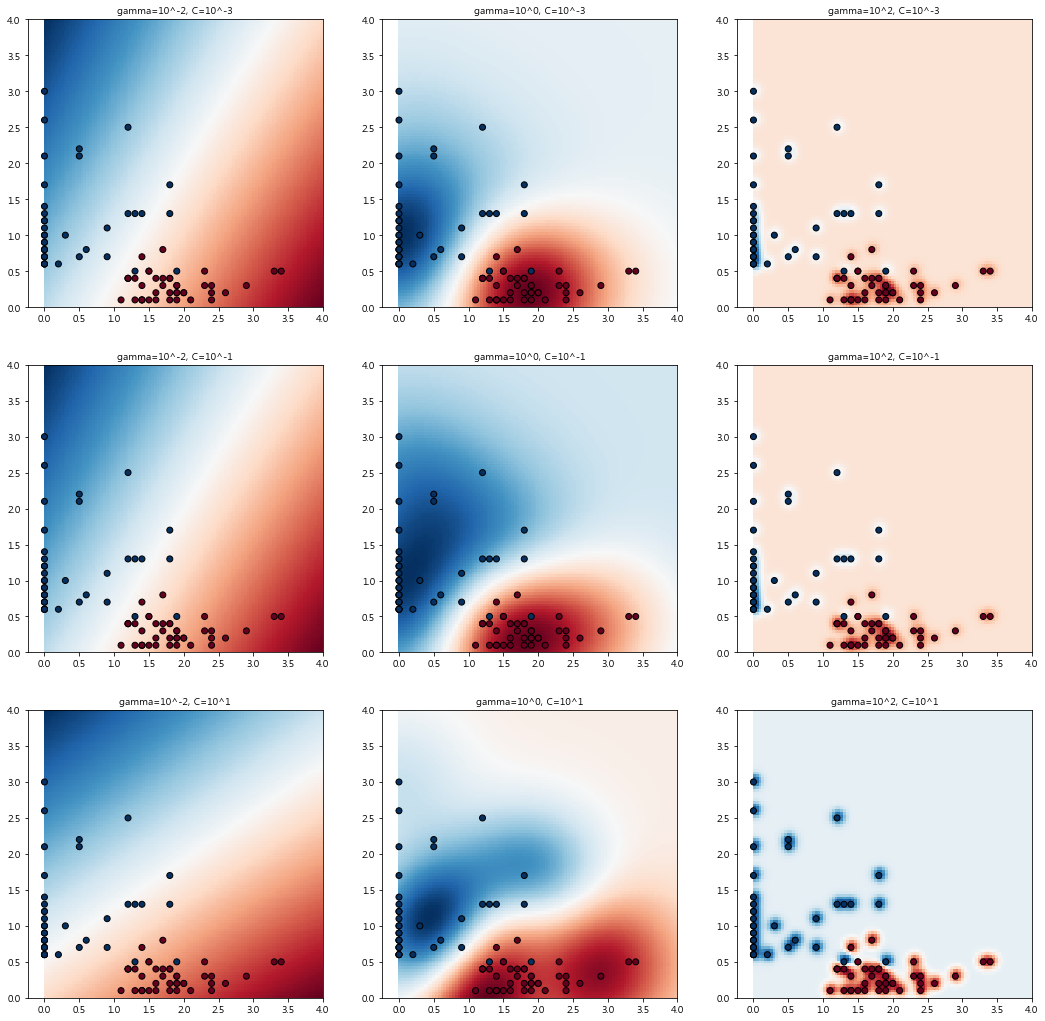

In [46]:
# 최적의 cost와 gamma 값 찾기 위한 훈련 과정 시각화
# 시각화(최적의 파라미터와 나머지 파라미터를 비교)
C_candidates = []
C_candidates.append(clf.best_params_["C"] * 0.01)
C_candidates.append(clf.best_params_["C"])
C_candidates.append(clf.best_params_["C"] * 100)

G_candidates = []
G_candidates.append(clf.best_params_["gamma"] * 0.01)
G_candidates.append(clf.best_params_["gamma"])
G_candidates.append(clf.best_params_["gamma"] * 100)

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

# 포지션에 해당하는 문자열 SG와 C를 벡터화.
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장.
classifiers = []
for C in C_candidates:
    for gamma in G_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

# 18,18 사이즈의 챠트를 구성.
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화.
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화.
    plt.subplot(len(C_candidates), len(G_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # 서포트 벡터와 결정경계선을 시각화합니다.
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

In [47]:
# 테스트
X_test = test[["3P", "BLK"]]
y_test = test["Pos"]

pred = clf.predict(X_test)

print("정확도: ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도:  0.95
              precision    recall  f1-score   support

           C       0.91      1.00      0.95        10
          SG       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [49]:
df_compare = pd.DataFrame({"prediction":pred, "ground_truth":y_test})
df_compare

,prediction,ground_truth
14,SG,SG
90,C,C
96,C,SG
40,C,C
21,SG,SG
10,C,C
58,SG,SG
20,SG,SG
59,SG,SG
32,SG,SG


In [53]:
### 손글씨 데이터(mnist)를 이용한 SVM

import urllib.request as req
import gzip, os, os.path
savepath = "./data/mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-images-idx3-ubyte.gz","t10k-labels-idx1-ubyte.gz"]

# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)

# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [54]:
import struct

def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./data/mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./data/mnist/"+name+"-images-idx3-ubyte", "rb")
    
    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n"  #> P1 or P4 = pbm,  P2 or P5 = pgm,  P3 or P6 = ppm
            s += " ".join(sdata)
            iname = "./data/mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()

# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 10000)
to_csv("t10k", 500)

In [55]:
from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./data/mnist/train.csv")
test = load_csv("./data/mnist/t10k.csv")

In [59]:
print(data["images"][1])
print("---------------")
print(data["labels"][1])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19921875, 0.62109375, 0.98828125, 0.62109375, 0.1953125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1875, 0.9296875, 0.984375, 0.984375, 0.984375, 0.92578125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2109375, 0.88671875, 0.9882

In [60]:
# 학습하기
clf = svm.SVC().fit(data["images"], data["labels"])

In [61]:
# 예측하기
pred = clf.predict(test["images"])

In [62]:
# 결과 확인
ac_score = metrics.accuracy_score(test["labels"], pred)
print("정확도: ", ac_score)

정확도:  0.9161676646706587


In [63]:
print(metrics.classification_report(test["labels"], pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      1.00      0.99        67
           2       0.96      0.89      0.92        55
           3       0.93      0.85      0.89        46
           4       0.90      0.96      0.93        55
           5       0.84      0.92      0.88        50
           6       0.97      0.86      0.91        43
           7       0.87      0.92      0.89        49
           8       0.90      0.88      0.89        40
           9       0.94      0.89      0.91        54

    accuracy                           0.92       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.92      0.92      0.92       501



In [64]:
pred = clf.predict([test["images"][7]])
pred  #> 7번째 있는 숫자 9로 예측

array([9])

In [65]:
print(test["labels"][7])

9


In [66]:
pred = clf.predict([test["images"][52]])
pred

array([5])

In [68]:
print(test["labels"][52])

5


In [69]:
pred = clf.predict([test["images"][109]])
pred

array([4])

In [70]:
print(test["labels"][109])

4


In [71]:
# html과 javascript 사용하여 마우스로 실제 숫자 그리기

input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>  #> canvas 그림 그릴 수 있는 html 태그
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>  #> 버튼 누르면 canvas 내용 지우기
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");  #> kernel.execute() canvas에 입력한 이미지를 주피터 노트북으로 가져오는 함수
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [72]:
from IPython.display import HTML

HTML(input_form + javascript)

In [89]:
print(image)  #> 마우스로 그린 숫자를 배열로 나타냄

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [90]:
pred1 = clf.predict([image])
pred1

array([2])